# Diagnostic Reference Level for Radiopharmaceuticals in NM- INC 

Elaborado por: Andrea Lizeth Lopez Rodriguez.Universidad Nacional de Colombia 

Inicialmente se importan los paquetes de Python que serán empleados en el análisis de los datos

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


##Archivo plano de texto, colocar los datos y los encabezados sin espacios 
#Para cargar los datos de actividades y volumenes
#data = pd.read_csv('DRLRF.txt', delim_whitespace =True)

#Para cargar los datos de Unidosis RF- INC: Enero 2019- Diciembre 2019
dat = pd.read_csv('UNIRF.txt', delim_whitespace =True)

#para ver los primeros datos
dat.head()

,DIA,MES,RF,EXAM,Actdosi
0,2,Enero,Tc,OSEA,20.0
1,2,Enero,Tc,OSEA,20.0
2,2,Enero,Tc,OSEA,20.0
3,2,Enero,Tc,OSEA,20.0
4,2,Enero,Tc,VENTRI,20.0


In [2]:
from scipy import stats

donde ActAdm -> Actividad Administrada y Actdosi -> Actividad dosificada en mCi. Vol -> Volumen en mL

In [3]:
##lista de tipos de datos por cada columna
dat.dtypes

DIA          int64
MES         object
RF          object
EXAM        object
Actdosi    float64
dtype: object

## Variables Categóricas

In [4]:
######Conteo de variables categoricas
####GROUP BY in Python 
data_test =dat[['RF','EXAM']]
dat["RF"].value_counts()

Tc    6201
F     1226
I      359
Ga     293
Lu      46
Ra       3
Name: RF, dtype: int64

In [83]:
#data_test

In [84]:
#sns.countplot(y="RF", data=dat,orient="h",color="c")

In [5]:
######Conteo de variables categoricas
dat["EXAM"].value_counts()

OSEA         2781
VENTRI       1548
DTPA         1430
FDG          1226
YODO          354
NANO          261
GADOTA        155
GAPSMA        138
MAA            52
NANOMAA        48
LUDOTATOC      46
DMSA           36
MIBI           27
HYNICTOC       16
MIBG            5
RADIO           3
ETILEN          1
IDA             1
Name: EXAM, dtype: int64

In [86]:
#sns.countplot(y="EXAM", data=dat,orient="h",color="c")

In [6]:
### Terapia 
listaTER= ((dat['RF']=='Ra') | (dat['RF']=='Lu') | (dat['RF']=='I'))
dTER = dat[listaTER]

In [7]:
##### Diagnóstico
listaPET= ((dat['RF']=='F') | (dat['RF']=='Ga'))
listaTC= dat['RF']=='Tc'
listad=((dat['RF']=='Tc')|(dat['RF']=='F') | (dat['RF']=='Ga'))
dd=dat[listad]
dPET = dat[listaPET]
dTC = dat[listaTC]
#lista

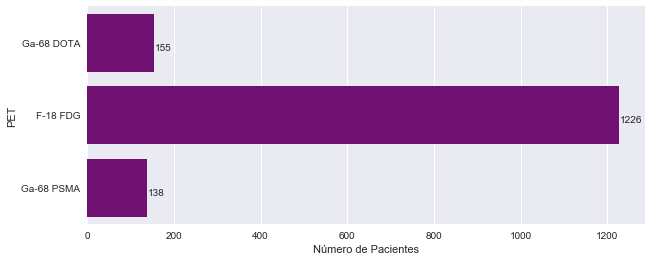

In [9]:
plt.figure(figsize=(10,4))
axy=sns.countplot(y="EXAM", data=dPET,orient="h",color="purple")
#plt.title('Medicina Nuclear 2019')
plt.ylabel('PET')
plt.xlabel('Número de Pacientes')

for p in axy.patches:
    axy.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+2, p.get_y()+0.5))

plt.yticks(np.arange(3), ['Ga-68 DOTA', 'F-18 FDG','Ga-68 PSMA'])      
###con data=df  -PET  
#plt.savefig('examPET.pdf')

####con data=df1 -Terapias
#plt.savefig('examTER.pdf')

#for p in axy.patches:
        #axy.annotate('{:.0f}'.format(p.get_height()), (p.get_height()+50, p.get_x()+0.5))

plt.savefig('examPET.pdf')

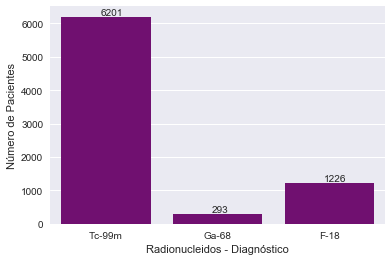

In [21]:
axx=sns.countplot(x="RF", data=dd,orient="h",color="purple")
#plt.title('Medicina Nuclear 2019')
plt.xlabel('Radionucleidos - Diagnóstico')
plt.ylabel('Número de Pacientes')

for p in axx.patches:
        axx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+50))
plt.xticks(np.arange(3), ['Tc-99m', 'Ga-68', 'F-18'])         
plt.savefig('RND.pdf')
#plt.savefig('RNTER.pdf')

In [98]:
#plt.figure(figsize=(12,8))
#sns.countplot(data=df, x="MES", hue="RF")

In [19]:
##########  Agrupando por examen #########
dat_group_exam = dat.groupby(['EXAM'],as_index=False)

## $\color{red}{\text{FDG}}$

In [52]:
FDG=dat_group_exam.get_group('FDG')

In [53]:
FDG['Actdosi'].max()

15.0

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


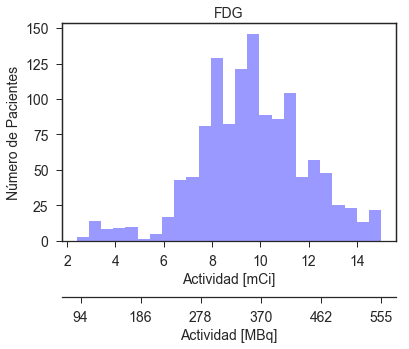

In [54]:
### Plot the data
ax1=plt.subplot(1,1,1)
sns.distplot(FDG['Actdosi'],kde=False,color='b',ax=ax1)
#plt.plot((15, 15),(0,125), '--k', linewidth=1) 
#plt.plot((4.2, 4.2),(0,125), '--k', linewidth=1) 

ax1.set_title('FDG',fontsize=14)
ax1.set_ylabel('Número de Pacientes',fontsize=14)
ax1.set_xlabel('Actividad [mCi]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')

## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(FDG['Actdosi'].min(),FDG['Actdosi'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Actividad [MBq]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)

#plt.savefig('fdgrf.pdf')

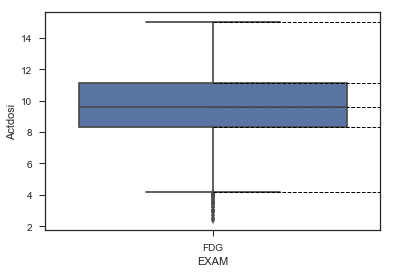

In [55]:
sns.boxplot(x="EXAM", y="Actdosi", data=FDG)

plt.plot((0,125),(4.2, 4.2), '--k', linewidth=1) 
plt.plot((0,125),(8.3, 8.3), '--k', linewidth=1) 
plt.plot((0,125),(9.6, 9.6), '--k', linewidth=1)
plt.plot((0,125),(11.1, 11.1), '--k', linewidth=1)
plt.plot((0,125),(15, 15), '--k', linewidth=1)

In [56]:
FDG['Actdosi'].describe()

count    1226.000000
mean        9.632113
std         2.236187
min         2.400000
25%         8.300000
50%         9.600000
75%        11.100000
max        15.000000
Name: Actdosi, dtype: float64

## $\color{red}{\text{Ga-Dota}}$

In [58]:
GADOTA =dat_group_exam.get_group('GADOTA')

In [64]:
GADOTA['Actdosi'].max()

5.5

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


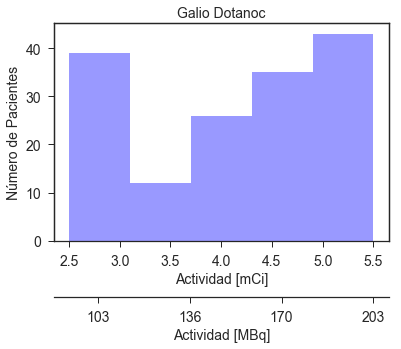

In [59]:
### Plot the data
ax1=plt.subplot(1,1,1)
sns.distplot(GADOTA['Actdosi'],kde=False,color='b',ax=ax1)

ax1.set_title('Galio Dotanoc',fontsize=14)
ax1.set_ylabel('Número de Pacientes',fontsize=14)
ax1.set_xlabel('Actividad [mCi]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')
## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(GADOTA['Actdosi'].min(),GADOTA['Actdosi'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Actividad [MBq]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)


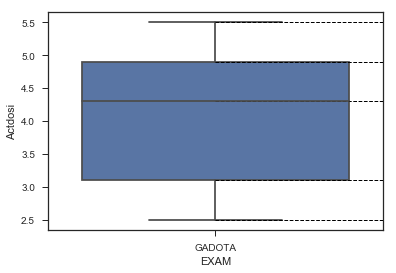

In [65]:
sns.boxplot(x="EXAM", y="Actdosi", data=GADOTA)

plt.plot((0,125),(2.5, 2.5), '--k', linewidth=1) 
plt.plot((0,125),(3.1, 3.1), '--k', linewidth=1) 
plt.plot((0,125),(4.3, 4.3), '--k', linewidth=1)
plt.plot((0,125),(4.9, 4.9), '--k', linewidth=1)
plt.plot((0,125),(5.5, 5.5), '--k', linewidth=1)

In [66]:
GADOTA['Actdosi'].describe()

count    155.000000
mean       4.186452
std        0.933161
min        2.500000
25%        3.100000
50%        4.300000
75%        4.900000
max        5.500000
Name: Actdosi, dtype: float64

## $\color{red}{\text{Ga-PSMA}}$

In [67]:
GAPSMA =dat_group_exam.get_group('GAPSMA')

In [68]:
GAPSMA['Actdosi'].max()

5.5

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


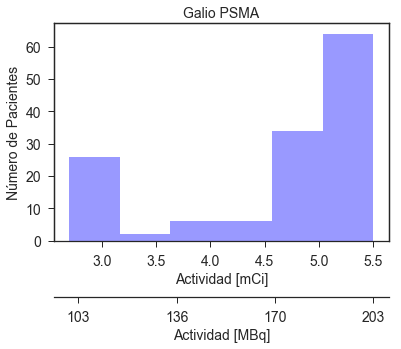

In [69]:
### Plot the data
ax1=plt.subplot(1,1,1)
sns.distplot(GAPSMA['Actdosi'],kde=False,color='b',ax=ax1)

ax1.set_title('Galio PSMA',fontsize=14)
ax1.set_ylabel('Número de Pacientes',fontsize=14)
ax1.set_xlabel('Actividad [mCi]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')
## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(GAPSMA['Actdosi'].min(),GAPSMA['Actdosi'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Actividad [MBq]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)

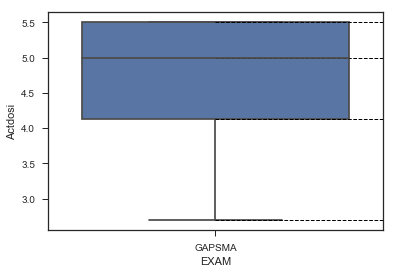

In [74]:
sns.boxplot(x="EXAM", y="Actdosi", data=GAPSMA)

plt.plot((0,125),(2.7, 2.7), '--k', linewidth=1) 
plt.plot((0,125),(4.13, 4.13), '--k', linewidth=1) 
plt.plot((0,125),(5.0, 5.0), '--k', linewidth=1)
#plt.plot((0,125),(4.9, 4.9), '--k', linewidth=1)
plt.plot((0,125),(5.5, 5.5), '--k', linewidth=1)

In [75]:
GAPSMA['Actdosi'].describe()

count    138.000000
mean       4.692029
std        0.949534
min        2.700000
25%        4.125000
50%        5.000000
75%        5.500000
max        5.500000
Name: Actdosi, dtype: float64

## Missing Values

Eliminar los valores faltantes a lo largo de las columnas "ActAdm", "Actdosi" y "Vol"

In [117]:
missing_data = data.isnull()
missing_data.head(5)

,RF,EXAM,ActAdm,Actdosi,Vol
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


### Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [118]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

RF
False    1013
Name: RF, dtype: int64

EXAM
False    1013
Name: EXAM, dtype: int64

ActAdm
False    1013
Name: ActAdm, dtype: int64

Actdosi
False    1013
Name: Actdosi, dtype: int64

Vol
False    1012
True        1
Name: Vol, dtype: int64



### Deal with missing data
Drop the whole row

In [119]:
# simply drop whole row with NaN in "Vol" column
data.dropna(subset=["Vol"], axis=0, inplace=True)

# reset index, because we droped one row
data.reset_index(drop=True, inplace=True)

## $\color{blue}{\text{Actividad especifica}}$

In [120]:
especifica=data["Actdosi"]/data["Vol"]
data['Esp']= especifica

## $\color{blue}{\text{Agrupar por Examen }}$ 

In [121]:
data_group_exam = data.groupby(['EXAM'],as_index=False)
data_group_rf = data.groupby(['RF'],as_index=False)

### Mediana-percentil 50 

In [122]:
data_group_exam.median()

,EXAM,ActAdm,Actdosi,Vol,Esp
0,CENTI,1.0,1.10,0.100,11.000000
1,DMSA,5.0,5.30,0.100,53.000000
2,FDG,9.5,19.30,1.800,13.100000
3,FILTRA,3.0,3.18,0.200,16.000000
4,GADOTA,4.6,5.49,7.500,0.813333
5,GAPSMA,5.3,5.50,8.000,0.716667
6,GPARA,20.0,19.94,0.375,53.421429
7,MDP,20.0,22.00,0.350,66.666667
8,RENO,3.0,3.24,0.200,16.000000
9,ROLLT,3.0,3.10,0.200,15.500000


### Minimo

In [123]:
data_group_exam.min()

,EXAM,RF,ActAdm,Actdosi,Vol,Esp
0,CENTI,Tc,0.25,0.21,0.10,2.100000
1,DMSA,Tc,5.00,5.30,0.10,53.000000
2,FDG,F,2.50,3.06,1.00,1.530000
3,FILTRA,Tc,3.00,3.00,0.10,3.000000
4,GADOTA,Ga,2.50,2.60,3.00,0.325000
5,GAPSMA,Ga,3.50,3.30,4.00,0.412500
6,GPARA,Tc,20.00,19.88,0.35,49.700000
7,MDP,Tc,15.00,15.00,0.15,23.090909
8,RENO,Tc,3.00,3.00,0.10,11.600000
9,ROLLT,Tc,3.00,3.07,0.16,12.600000


### Máximo

In [124]:
data_group_exam.max()

,EXAM,RF,ActAdm,Actdosi,Vol,Esp
0,CENTI,Tc,3.0,4.32,0.3,28.333333
1,DMSA,Tc,5.0,5.30,0.1,53.000000
2,FDG,F,15.0,89.00,4.0,64.600000
3,FILTRA,Tc,20.0,20.00,1.0,30.000000
4,GADOTA,Ga,5.5,12.20,10.0,1.933333
5,GAPSMA,Ga,5.5,14.00,10.0,2.333333
6,GPARA,Tc,20.0,20.00,0.4,57.142857
7,MDP,Tc,25.0,32.60,1.1,134.000000
8,RENO,Tc,3.0,3.80,0.3,33.000000
9,ROLLT,Tc,3.0,3.78,0.3,19.187500


### Desviación Estandar

In [125]:
data_group_exam.std()

AttributeError: 'str' object has no attribute 'sqrt'

In [83]:
## Variables Categóricas
##Datos de tecneciados corresponden al mes de Enero de 2019. Datos de FDG corresponden a Enero-27 Junio de 2019. Datos Ga DOTA de Enero-Octubre de 2019. 
#Datos de Ga PSMA de Enero-Octubre de 2019
#dat_group_rf = dat.groupby(['RF'],as_index=False).sum()
#dat_group_rf
######Conteo de variables categoricas
####GROUP BY in Python 
#data_test =dat[['RF','EXAM']]
#data["RF"].value_counts()
#sns.countplot(y="RF", data=data,orient="h",color="c")
######Conteo de variables categoricas
#data["EXAM"].value_counts()
#sns.countplot(y="EXAM", data=data,orient="h",color="c")
#plt.bar(dat_group_rf['RF'],dat_group_rf['Vol'])
#dat_group_exam = dat.groupby(['EXAM'],as_index=False).sum()
#dat_group_exam
#plt.bar(dat_group_exam['EXAM'],dat_group_exam['Vol'])

Filtrando datos por Radiofarmaco : Tc-99m(Tc), F-18(F), Ga-68 PSMA(GaPSMA) y Ga-68 DOTA(GaDOTA). 

## Variables Númericas 

## $\color{red}{\text{Tc-99m}}$

In [126]:
######################################### Tc-99m ##############################################
#Tecnecio = ['Tc']
#data_Tc =data[data.RF.isin(Tecnecio)]
#data_Tc.shape

data_Tc=data_group_rf.get_group('Tc')

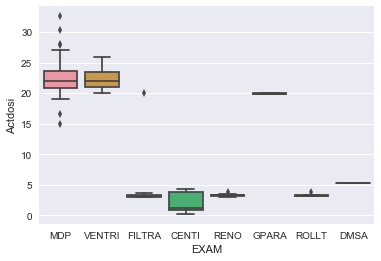

In [127]:
sns.boxplot(x="EXAM", y="Actdosi", data=data_Tc)

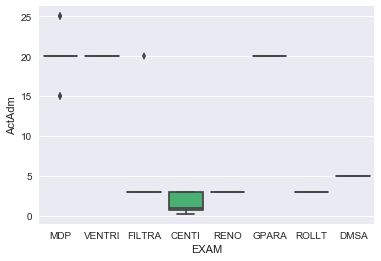

In [128]:
sns.boxplot(x="EXAM", y="ActAdm", data=data_Tc)

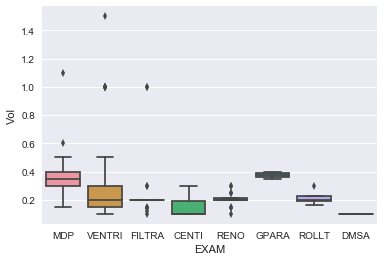

In [129]:
sns.boxplot(x="EXAM", y="Vol", data=data_Tc)

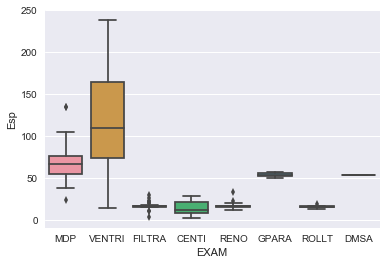

In [130]:
sns.boxplot(x="EXAM", y="Esp", data=data_Tc)

In [136]:
MDP =data_group_exam.get_group('MDP')

In [137]:
MDP.std()

ActAdm      1.132277
Actdosi     2.436212
Vol         0.104408
Esp        16.646655
dtype: float64

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


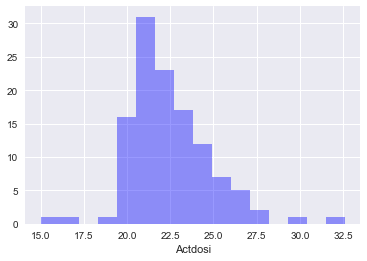

In [138]:
sns.distplot(MDP['Actdosi'],kde=False,color='b')

In [139]:
VENTRI =data_group_exam.get_group('VENTRI')

In [140]:
VENTRI.std()

ActAdm      0.000000
Actdosi     1.549877
Vol         0.258241
Esp        55.871759
dtype: float64

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


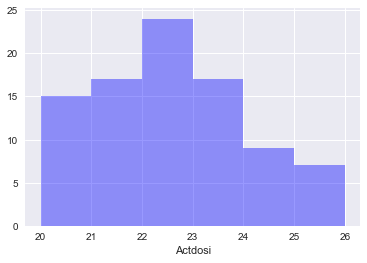

In [141]:
sns.distplot(VENTRI['Actdosi'],kde=False,color='b')

## $\color{red}{\text{F-18}}$

In [91]:
######################################### F-18 ##############################################
#Fluor = ['F']
#data_F =data[data.RF.isin(Fluor)]
#data_F.shape

data_F=data_group_rf.get_group('F')

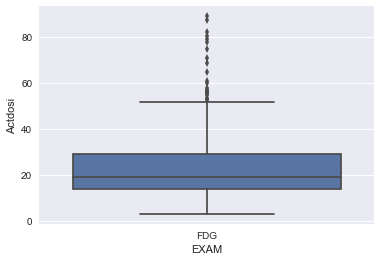

In [150]:
sns.boxplot(x="EXAM", y="Actdosi", data=data_F)

In [151]:
data_F.describe()

,ActAdm,Actdosi,Vol,Esp
count,553.000000,553.000000,553.000000,553.000000
mean,9.445136,23.434521,1.635805,15.460020
std,2.222082,13.625090,0.523075,9.334624
min,2.500000,3.060000,1.000000,1.530000
25%,8.100000,14.000000,1.000000,8.888889
50%,9.500000,19.300000,1.800000,13.100000
75%,10.800000,29.000000,2.000000,19.500000
max,15.000000,89.000000,4.000000,64.600000


/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Número de Pacientes')

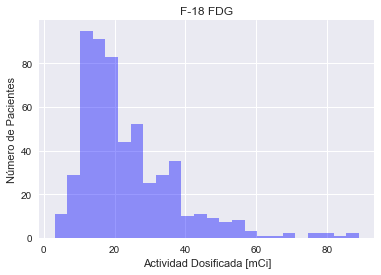

In [95]:
sns.distplot(data_F['Actdosi'],kde=False,color='b')
plt.title('F-18 FDG')
plt.xlabel('Actividad Dosificada [mCi]')
plt.ylabel('Número de Pacientes')

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Número de Pacientes')

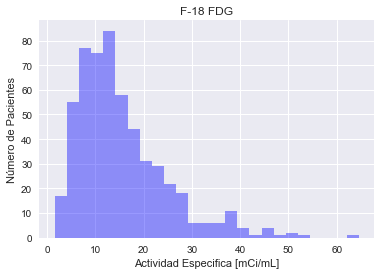

In [97]:
sns.distplot(data_F['Esp'],kde=False,color='b')
plt.title('F-18 FDG')
plt.xlabel('Actividad Especifica [mCi/mL]')
plt.ylabel('Número de Pacientes')

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Número de Pacientes')

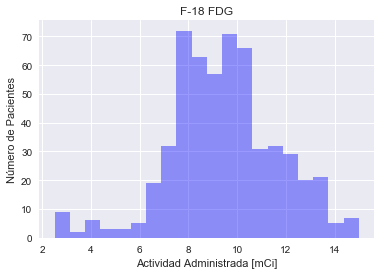

In [98]:
sns.distplot(data_F['ActAdm'],kde=False,color='b')
plt.title('F-18 FDG')
plt.xlabel('Actividad Administrada [mCi]')
plt.ylabel('Número de Pacientes')

## $\color{red}{\text{Ga-68}}$

In [144]:
######################################### Ga-68 ##############################################
data_Ga=data_group_rf.get_group('Ga')

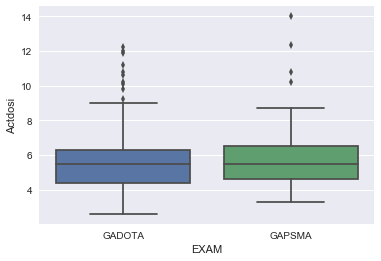

In [145]:
sns.boxplot(x="EXAM", y="Actdosi", data=data_Ga)

In [147]:
GADOTA =data_group_exam.get_group('GADOTA')

In [149]:
GADOTA.std()

ActAdm     0.736526
Actdosi    2.170093
Vol        1.366018
Esp        0.380747
dtype: float64

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


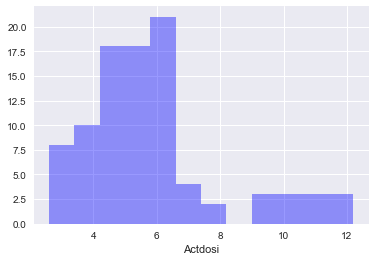

In [148]:
sns.distplot(GADOTA['Actdosi'],kde=False,color='b')